In [2]:
import pandas as pd 
import numpy as np

movies = pd.read_json('IMDB_movie_details.json', lines = True)
reviews = pd.read_json('IMDB_reviews.json', lines = True)

In [2]:
movies.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [3]:
movies.movie_id = movies.movie_id.astype('str')
reviews.movie_id = reviews.movie_id.astype('str')

In [4]:
df = pd.merge(movies, reviews, on='movie_id')

In [5]:
df['date_datetime'] = pd.to_datetime(df.review_date)

In [6]:
df['date_datetime'] = df['date_datetime'].dt.year

In [35]:
df['date_datetime'].value_counts()

date_datetime
2017    45103
2006    41529
2015    40079
2005    38394
2014    37335
2013    35828
2016    34389
2007    33722
2008    32190
2012    30052
2010    28059
2009    25996
2011    24419
2003    24013
2002    22649
2004    21640
2001    19942
2000    17286
1999    16821
1998     3932
2018      528
Name: count, dtype: int64

In [ ]:
import datetime as dt
df['delta_time'] = dt.timedelta()

In [6]:
df.head()

,movie_id,plot_summary,duration,genre,rating_x,release_date,plot_synopsis,review_date,user_id,is_spoiler,review_text,rating_y,review_summary
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",5 March 2008,ur16517420,True,The second Tom Clancy novel made into a film (...,6,decent Clancy thriller
1,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",15 October 2007,ur13887584,True,The second in what looks like becoming the 'Ja...,7,Jack Ryan Chapter II
2,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",16 September 2013,ur2403537,True,I was not a fan of The Hunt For Red October. I...,8,It's filled to the brim with excitement and it...
3,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",15 May 2007,ur0819382,True,Jack Ryan (Harrison Ford) is a CIA analyst who...,7,Patriotic Gore.
4,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in...",29 February 2004,ur2567338,True,This was one of the big summer movies of 1992....,7,Harrison Ford In Another Tom Clancy Adaptation


In [32]:
df.genre.value_counts()

genre
[Action, Adventure, Sci-Fi]     39842
[Action, Adventure, Fantasy]    22658
[Crime, Drama]                  19258
[Drama]                         17976
[Drama, Romance]                16418
                                ...  
[Action, Comedy, Family]           34
[Adventure, Family, Romance]       32
[Comedy, Crime, Fantasy]           25
[Romance]                          18
[Family, Fantasy, Music]           12
Name: count, Length: 237, dtype: int64

In [21]:
tot_gen = [df['genre'][i][0]  for i in range(len(df))]

In [30]:
gen_lens = [len(df.genre[i]) for i in range(len(df))]

(array([ 36876.,      0.,      0.,      0.,      0., 125233.,      0.,
             0.,      0., 411797.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

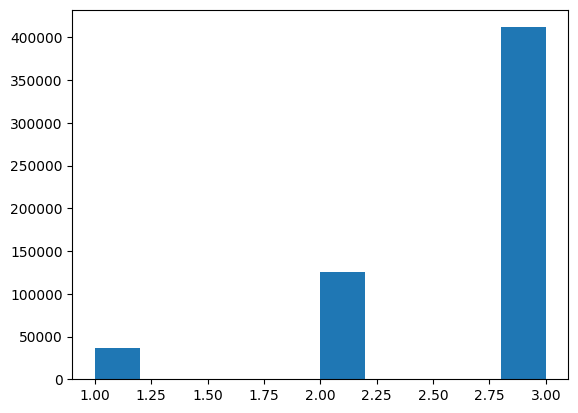

In [31]:
plt.hist(gen_lens)

In [10]:
df.is_spoiler.value_counts(normalize = True)

is_spoiler
False    0.737023
True     0.262977
Name: proportion, dtype: float64

In [8]:
df.plot_summary.groupby(df.movie_id).value_counts()

movie_id   plot_summary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [78]:
df.is_spoiler.groupby(df.movie_id).value_counts(normalize = True)

movie_id   is_spoiler
tt0012349  False         0.750000
           True          0.250000
tt0015864  False         0.695312
           True          0.304688
tt0017136  False         0.783383
                           ...   
tt6868216  True          0.384615
tt7608418  False         0.794872
           True          0.205128
tt7608534  False         0.611111
           True          0.388889
Name: proportion, Length: 3140, dtype: float64

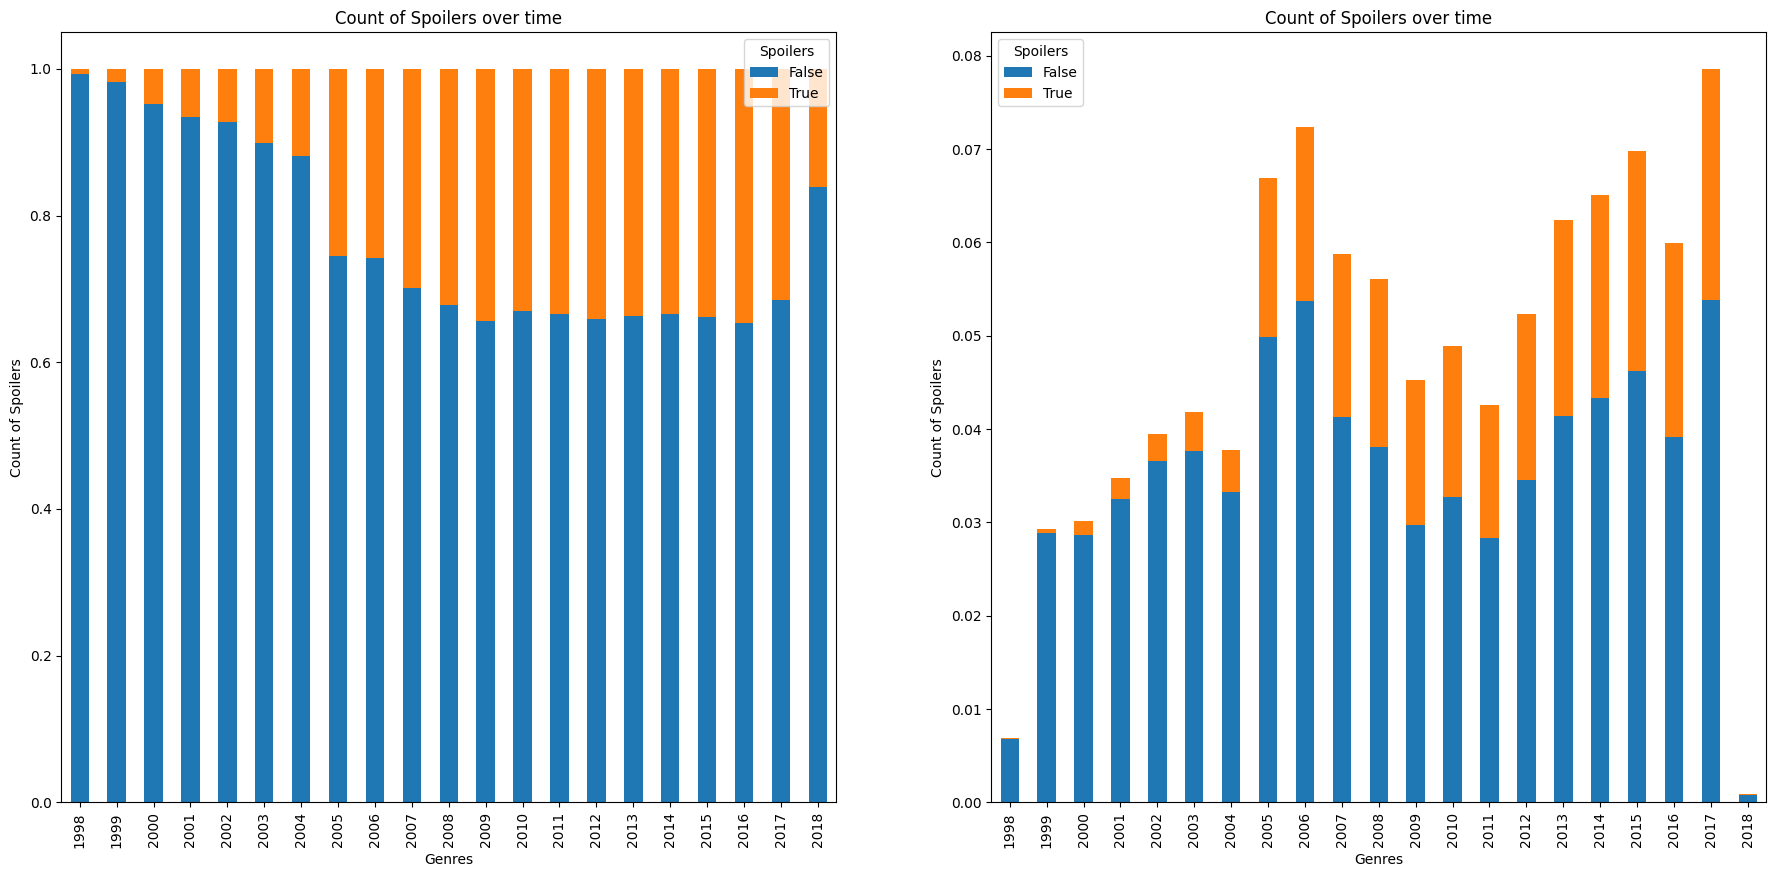

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
colors  = ['g', 'r']
crosstab = pd.crosstab(df.date_datetime, df['is_spoiler'].values, normalize= 'index' )
crosstab.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Count of Spoilers over time')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Count of Spoilers')
ax1.legend(title='Spoilers')

crosstab = pd.crosstab(df.date_datetime, df['is_spoiler'].values, normalize= True )
crosstab.plot(kind='bar', stacked=True, ax=ax2) 
ax2.set_title('Count of Spoilers over time')
ax2.set_xlabel('Genres')
ax2.set_ylabel('Count of Spoilers')
ax2.legend(title='Spoilers')
plt.show()